In [91]:
from essentials.Util import load_from_pickle_file
from scipy.io import savemat

import numpy as np

results_dir = 'results/ER0.5625/m10/'
truth, out, bias = load_from_pickle_file(results_dir+'simulation_output')

In [92]:
ensemble = out[0].copy()

In [93]:
phi = ensemble.get_current_state[:-ensemble.Na]
alpha = ensemble.get_current_state[-ensemble.Na:]


phi, alpha = [np.mean(xx, axis=-1) for xx in [phi, alpha]]


In [99]:
from essentials.physical_models import Annular


kwargs = dict(phi0=phi)
for key, val in zip(ensemble.est_a, alpha):
    kwargs[key] = val

case = Annular(**kwargs)

In [100]:
psi, t = case.time_integrate(Nt=9.//case.dt)
case.update_history(psi=psi, t=t)

y = case.get_observable_hist(len(t))


(8.998047, 8.99998)

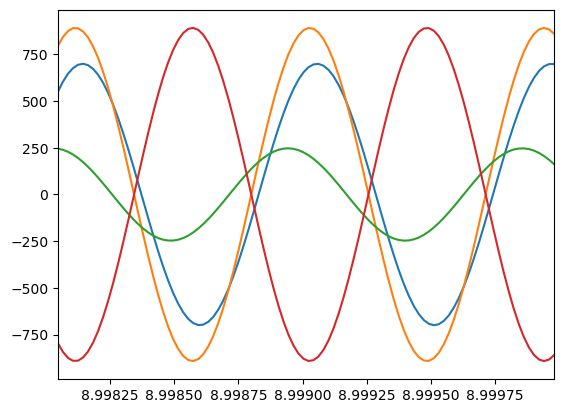

In [101]:
import matplotlib.pyplot as plt
plt.plot(t, np.mean(y, axis=-1))
plt.xlim([t[-100], t[-1]])



In [107]:
Nt = int(8.//case.dt)+1
y = case.get_observable_hist(Nt)
t = case.hist_t[-Nt:]
savemat('presure_for_quaternions.mat', {'y': y, 't': t})

In [ ]:
psi1, t1 = ensemble.time_integrate(Nt=case.t_transient//case.dt)

ensemble.update_history(psi=psi1, t=t1)
y1 = ensemble.get_observable_hist(len(t1))


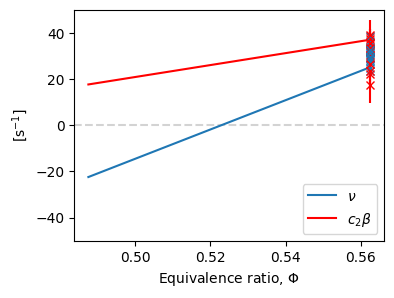

In [20]:
from essentials.Util import load_from_pickle_file
from scipy.io import savemat
from essentials.physical_models import Annular
import matplotlib.pyplot as plt
import numpy as np


ERs = 0.4875 + np.arange(0, 4) * 0.025

NUs, C2Bs = [], []
for ER in ERs:
    NUs.append(Annular.nu_from_ER(ER))
    C2Bs.append(Annular.c2beta_from_ER(ER))

fig = plt.figure(figsize=(4, 3))
plt.axhline(y=0, color='lightgrey', ls='--')
plt.plot(ERs, NUs, '-', color='C0', label='$\\nu$')
plt.plot(ERs, C2Bs, '-', color='r', label=Annular.params_labels['c2beta'])
plt.xlabel('Equivalence ratio, $\Phi$')
plt.ylabel('[s$^{-1}$]')
plt.ylim([-50, 50])
plt.legend(loc='lower right')



ER = 0.5625 
results_dir = 'results/ER{}/m{}/'.format(ER, 10)


# save_to_pickle_file(results_dir + 'simulation_output_varying_k', truth, out, bias, ensemble)
truth, out, bias, ensemble = load_from_pickle_file(results_dir + 'simulation_output_varying_k')



    


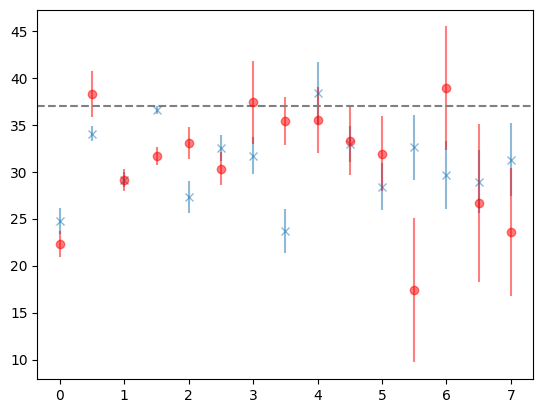

In [32]:
for ii, ens in enumerate(out):
    nu_idx, c2beta_idx = [ens.est_a.index(key) for key in ['nu', 'c2beta']]
    nus = ens.get_current_state[ens.Nphi + nu_idx]
    c2betas = ens.get_current_state[ens.Nphi + c2beta_idx]
    plt.errorbar(ens.regularization_factor, np.mean(nus), np.std(nus), marker='x', alpha=0.5, c='C0')
    plt.errorbar(ens.regularization_factor, np.mean(c2betas), np.std(c2betas), alpha=0.5,marker='o',c='r')
plt.axhline(y=Annular.c2beta_from_ER(ER), ls='--', c='gray')